In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.ticker import PercentFormatter

In [36]:
df = pd.read_csv("title.basics.tsv", sep='\t')

C:\Users\phili\AppData\Local\Temp\ipykernel_26872\193038313.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("title.basics.tsv", sep='\t')


In [37]:
df_basics = pd.read_csv("title.basics.tsv", sep='\t',  
                 na_values='\\N')        

# Filtrage des films post-1970
movies = df_basics[
    (df_basics['titleType'] == 'movie') & 
    (df_basics['startYear'] >= 1970) &
    (df_basics['genres'].isna())
].copy()

# Nettoyage des genres
movies['genres'] = movies['genres'].str.split(',')

C:\Users\phili\AppData\Local\Temp\ipykernel_26872\881740128.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_basics = pd.read_csv("title.basics.tsv", sep='\t',


In [38]:
# Chargement avec sélection et tri initial des colonnes
cols_ordre = [
    'tconst',            # Identifiant unique (priorité 1)
    'originalTitle',     # Titre original
    'startYear',         # Année de sortie
    'runtimeMinutes',    # Durée
    'genres',            # Genres
    'titleType',         # Type de métrage
]

In [39]:
colonnes_a_supprimer = ['originalTitle']
df = df.drop(columns=[col for col in colonnes_a_supprimer if col in df.columns])

🔄 Chargement des données...


C:\Users\phili\AppData\Local\Temp\ipykernel_26872\3682095108.py:18: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


🧹 Filtrage des données...

🎬 Durée moyenne par genre (depuis 1970, votes > 26, note > 8):
genres
History      128.0
Biography    122.7
Action       120.5
Crime        118.7
Romance      118.1
War          116.3
Drama        116.3
Western      114.7
Family       113.9
Sci-Fi       112.4
Sport        110.1
Thriller     108.8
Mystery      108.5
Adventure    106.5
Fantasy      106.2
Comedy       106.2
Horror        97.4
Animation     91.2


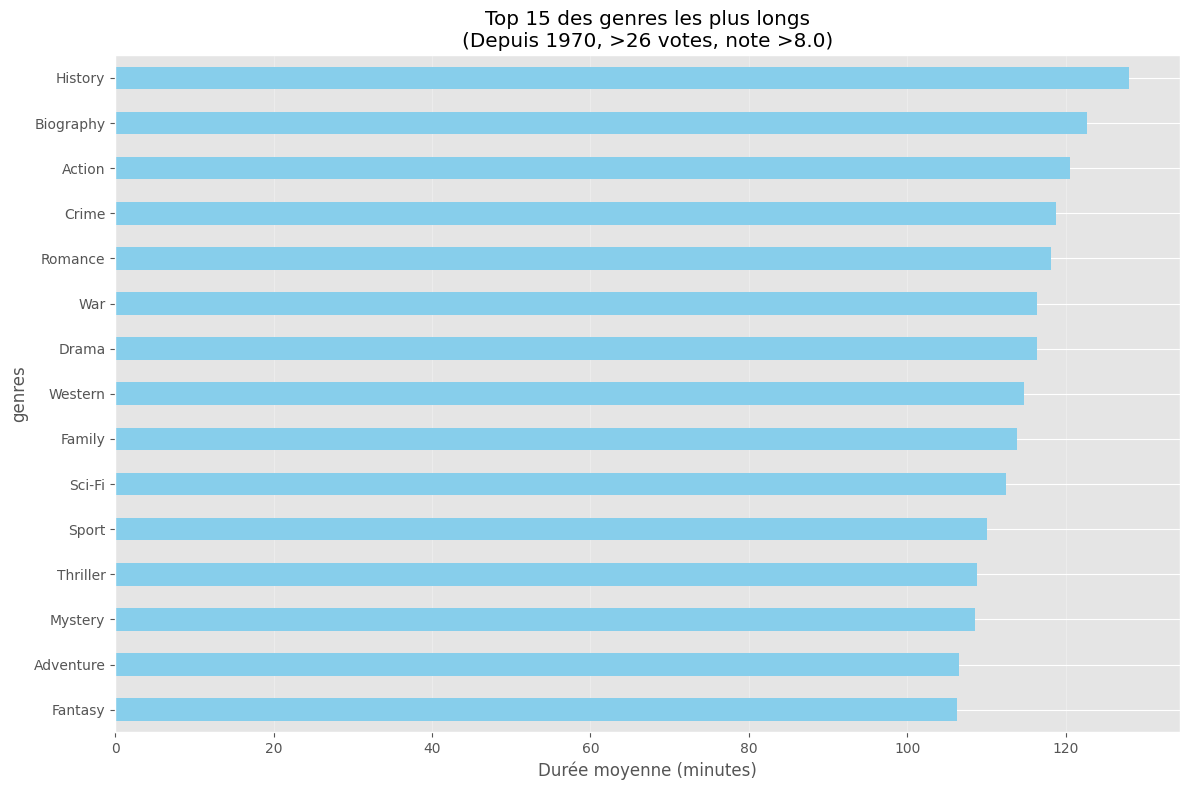

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuration
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Paramètres
GENRES_A_EXCLURE = 'Documentary|Short|News|Music|Talk-Show|Reality-TV|Game-Show|Adult|NaN|tvEpisode'
ANNEE_MIN = 1970
VOTES_MIN = 26
NOTE_MIN = 8.0
PERIODES = [(1970, 1979), (1980, 1989), (1990, 1999), 
            (2000, 2009), (2010, 2019), (2020, 2023)]

# Chargement des données
print("🔄 Chargement des données...")
df = pd.read_csv(
    'title.basics.tsv',
    sep='\t',
    usecols=['tconst', 'titleType', 'genres', 'startYear', 'runtimeMinutes'],
    dtype={'startYear': 'Int16'},
    na_values='\\N'
)

# Conversion et nettoyage
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')

# Filtrage principal
print("🧹 Filtrage des données...")
films = df[
    (df['titleType'] == 'movie') &
    (df['startYear'] >= ANNEE_MIN) &
    (~df['genres'].str.contains(GENRES_A_EXCLURE, case=False, na=False)) &
    (df['runtimeMinutes'] > 0)
].copy()

# Chargement des notes
ratings = pd.read_csv(
    'title.ratings.tsv',
    sep='\t',
    usecols=['tconst', 'averageRating', 'numVotes']
)

# Fusion et filtrage supplémentaire
films = films.merge(ratings, on='tconst')
films = films[
    (films['numVotes'] > VOTES_MIN) & 
    (films['averageRating'] > NOTE_MIN)
]

# Traitement des genres (explode après avoir exclu les genres indésirables)
films['genres'] = films['genres'].str.split(',')
films = films.explode('genres').dropna(subset=['genres'])

# Calcul des durées moyennes
durees = films.groupby('genres')['runtimeMinutes'].mean().sort_values(ascending=False)

# Affichage des résultats
print("\n🎬 Durée moyenne par genre (depuis 1970, votes > 26, note > 8):")
print(durees.round(1).to_string())

# Visualisation
plt.figure(figsize=(12, 8))
durees.head(15).sort_values().plot.barh(color='skyblue')
plt.title(f"Top 15 des genres les plus longs\n(Depuis {ANNEE_MIN}, >{VOTES_MIN} votes, note >{NOTE_MIN})")
plt.xlabel('Durée moyenne (minutes)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

🔄 Chargement des données...
🧹 Fusion et nettoyage des données...
📊 Calcul des scores par décennie...


C:\Users\phili\AppData\Local\Temp\ipykernel_26872\124580723.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movies.groupby(['decade', 'genres'])
C:\Users\phili\AppData\Local\Temp\ipykernel_26872\124580723.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_stats['Popularite_norm'] = decade_stats.groupby('decade')['Popularite'].transform(


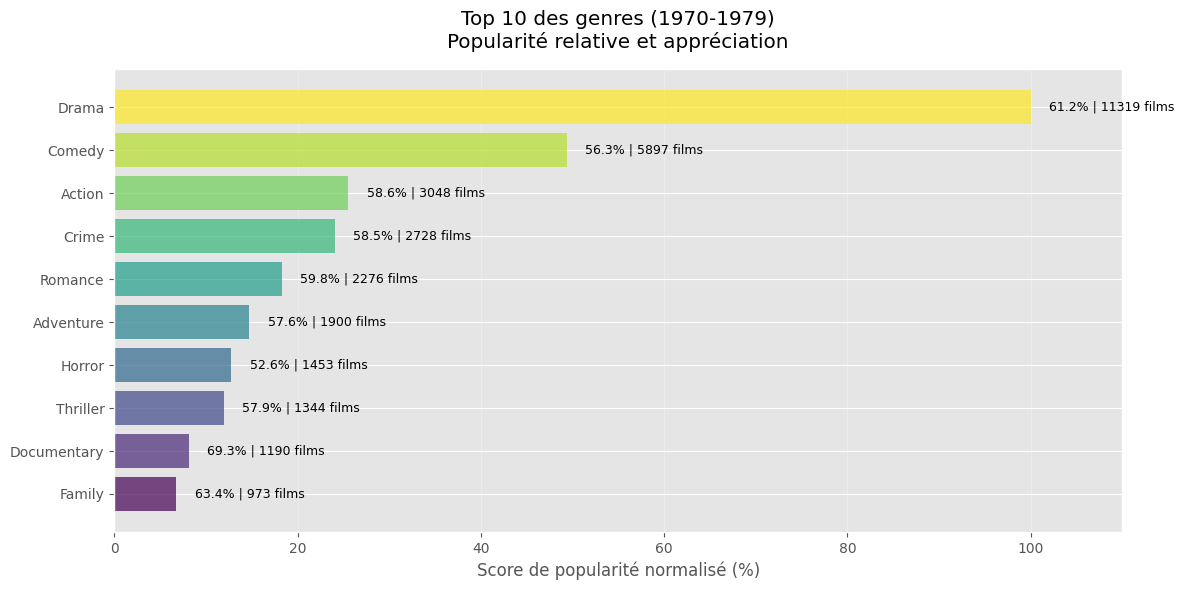

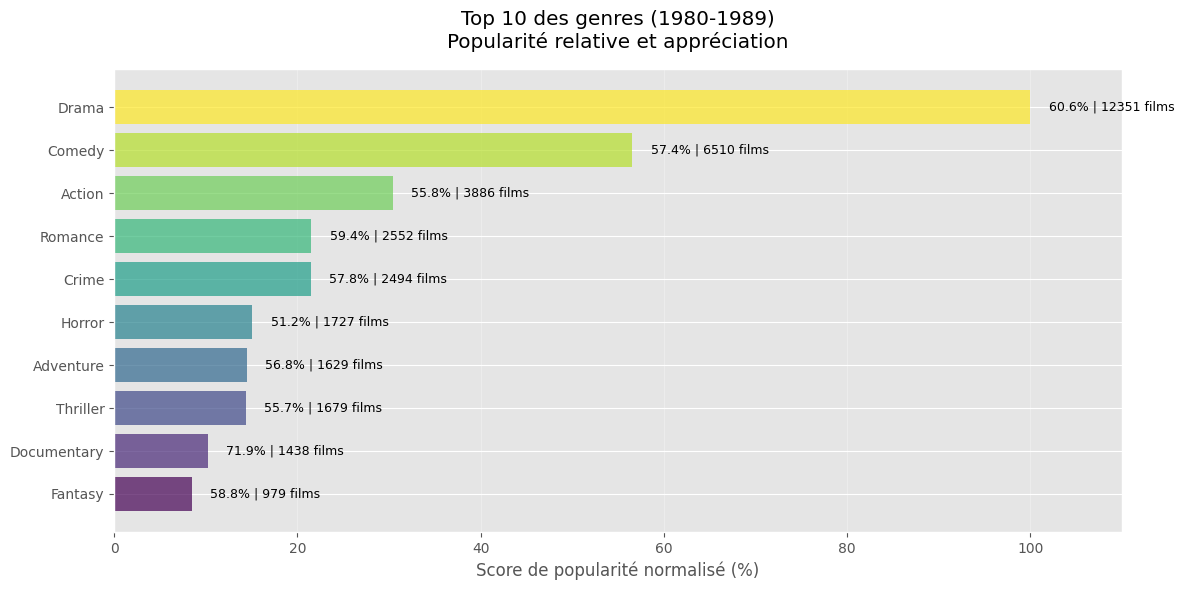

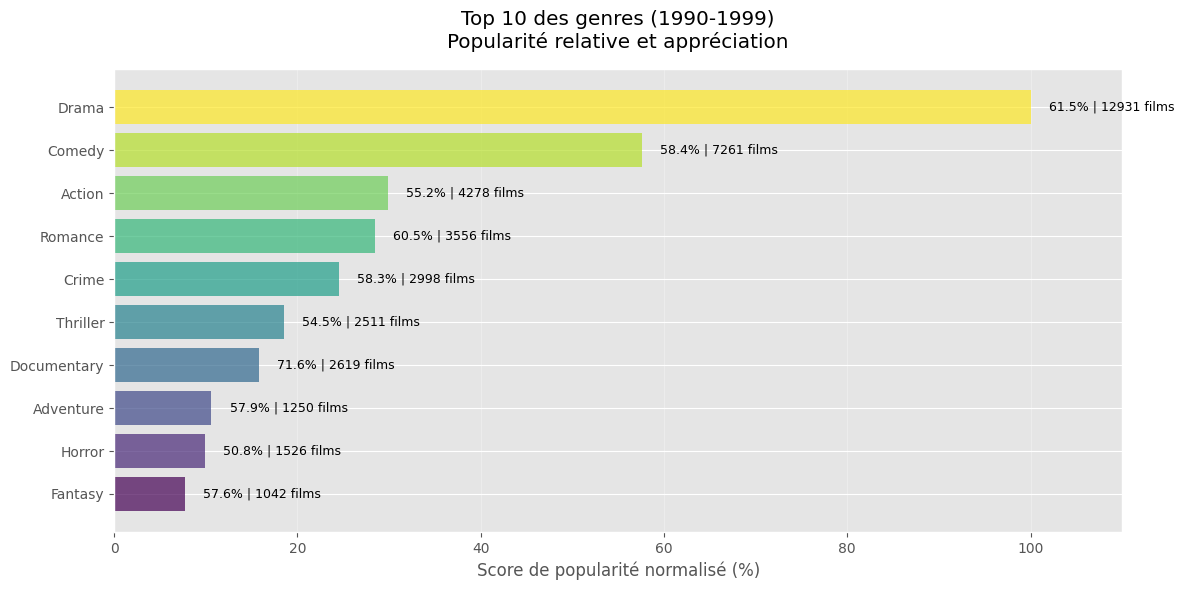

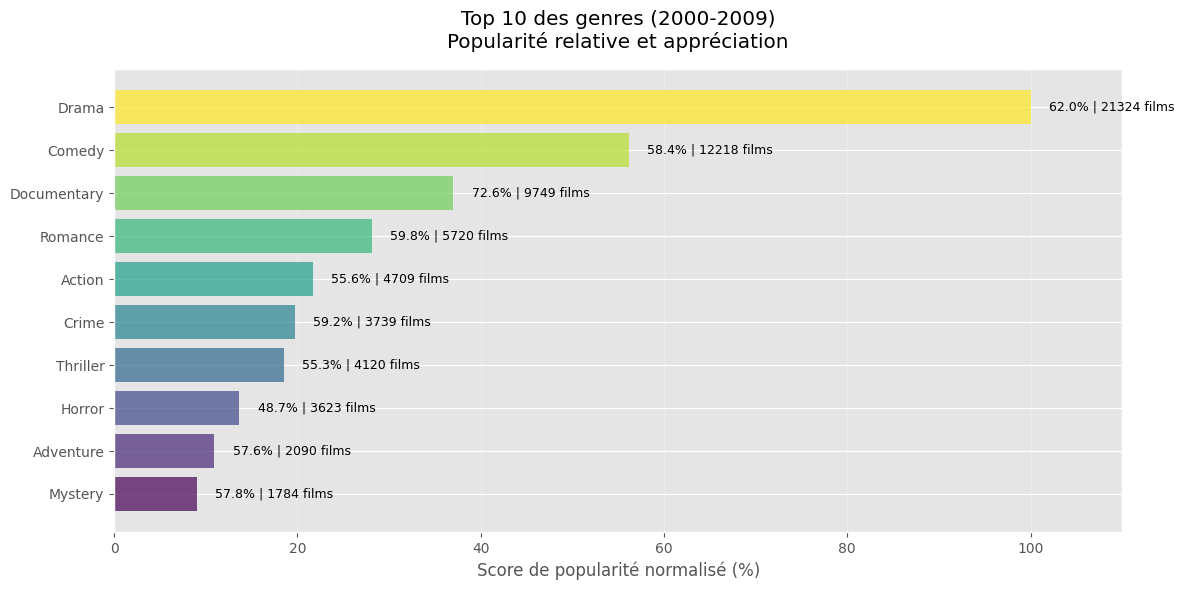

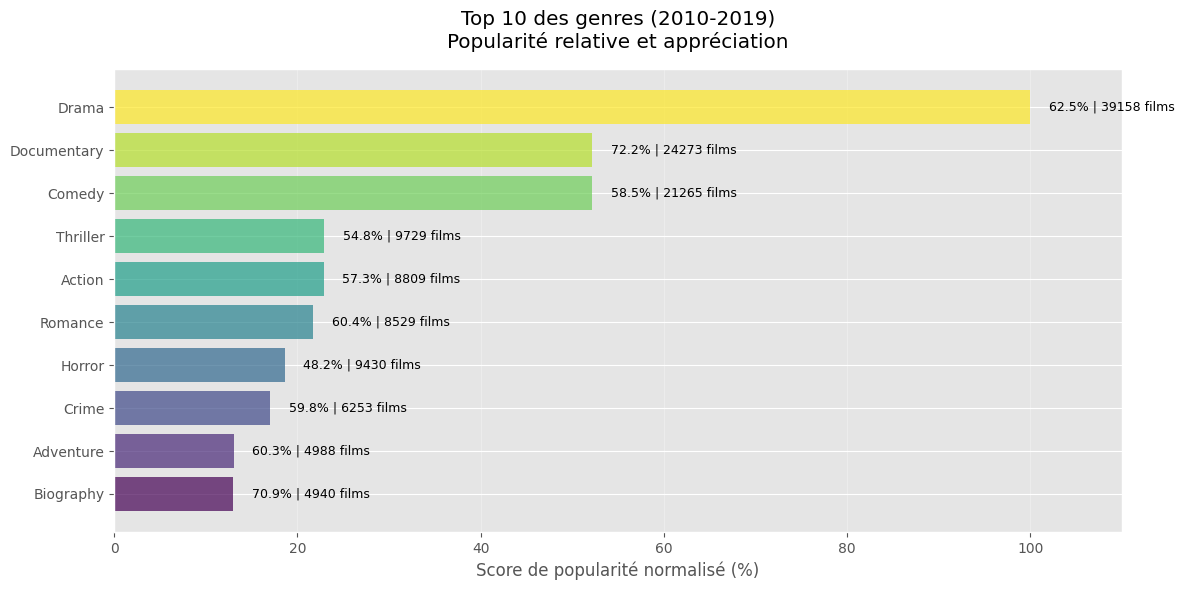


📈 Évolution des genres sur toutes les décennies :


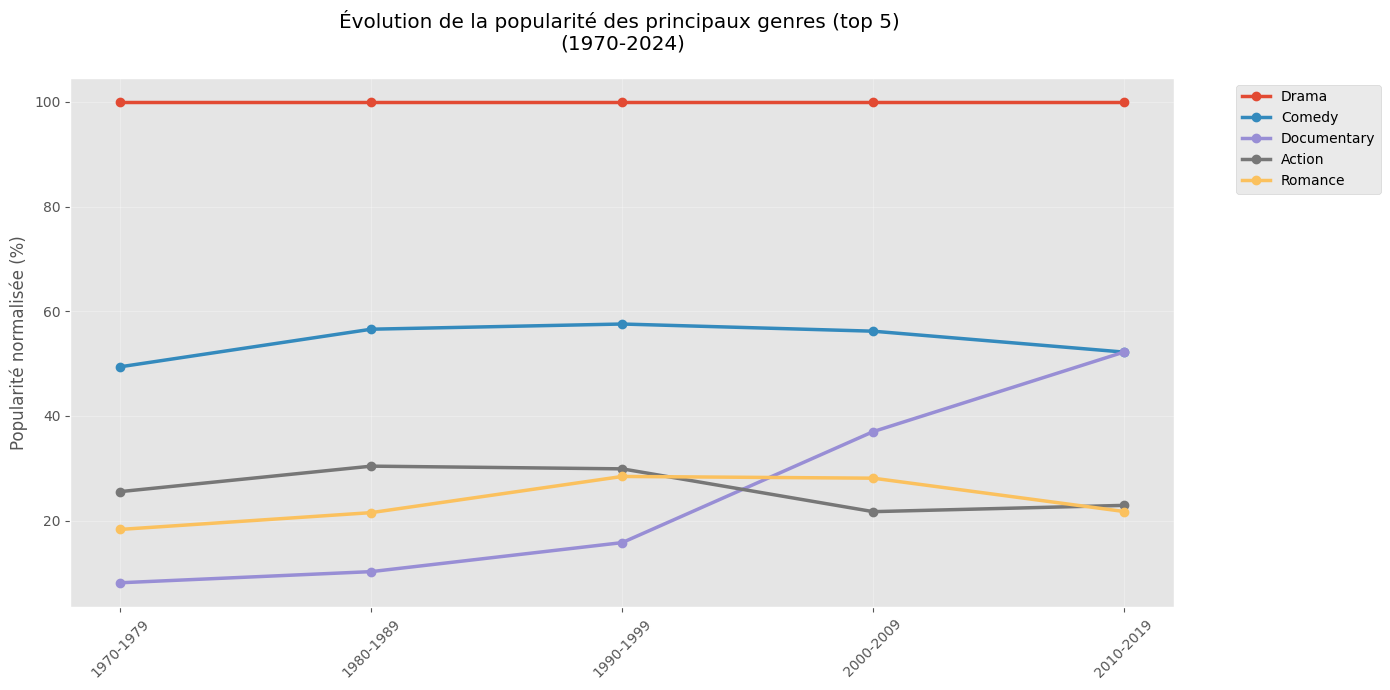

In [42]:
# Configuration
plt.style.use('ggplot')
pd.set_option('display.max_rows', 100)

# Genres à exclure
genres_exclus = ['Adult', 'Game-Show', 'Talk-Show', 'Reality-TV', 'News', 'Short']

# 1. Chargement des données
print("🔄 Chargement des données...")
basics = pd.read_csv('title.basics.tsv', sep='\t', 
                    usecols=['tconst', 'titleType', 'startYear', 'genres'],
                    dtype={'startYear': 'Int16'},
                    na_values='\\N')

ratings = pd.read_csv('title.ratings.tsv', sep='\t',
                    dtype={'tconst': 'string', 'averageRating': 'float32', 'numVotes': 'Int32'},
                    na_values='\\N')

# 2. Fusion et filtrage
print("🧹 Fusion et nettoyage des données...")
movies = (
    basics[(basics['titleType'] == 'movie') & 
          (basics['startYear'] >= 1970) &
          (basics['genres'].notna())]
    .merge(ratings, on='tconst')
    .dropna(subset=['startYear', 'averageRating', 'numVotes'])
    .astype({'startYear': 'int16'})
)

# 3. Traitement des genres et décennies
movies = movies.assign(genres=movies['genres'].str.split(',')).explode('genres')
movies = movies[~movies['genres'].isin(genres_exclus)]

# Création des tranches de décennies
decades = list(range(1970, 2023, 10))
movies['decade'] = pd.cut(movies['startYear'], 
                         bins=decades,
                         right=False,
                         labels=[f"{x}-{x+9}" for x in decades[:-1]])

# 4. Calcul des métriques par décennie
print("📊 Calcul des scores par décennie...")
movies['rating_pct'] = movies['averageRating'] * 10
movies['weighted_score'] = movies['rating_pct'] * np.log1p(movies['numVotes'])

# Agrégation par décennie et genre
decade_stats = (
    movies.groupby(['decade', 'genres'])
    .agg(
        Appreciation=('rating_pct', 'mean'),
        Popularite=('weighted_score', 'sum'),
        Count=('tconst', 'count')
    )
    .reset_index()
)

# Normalisation par décennie
decade_stats['Popularite_norm'] = decade_stats.groupby('decade')['Popularite'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) * 100
)

# 5. Visualisation par décennie
for decade in decades[:-1]:
    decade_str = f"{decade}-{decade+9}"
    decade_data = decade_stats[decade_stats['decade'] == decade_str].nlargest(10, 'Popularite')
    
    if len(decade_data) == 0:
        continue
        
    plt.figure(figsize=(12, 6))
    bars = plt.barh(decade_data['genres'][::-1], 
                   decade_data['Popularite_norm'][::-1],
                   color=plt.cm.viridis(np.linspace(0, 1, len(decade_data))),
                   alpha=0.7)
    
    # Annotations
    for i, (_, row) in enumerate(decade_data[::-1].iterrows()):
        plt.text(row['Popularite_norm'] + 2, i,
                f"{row['Appreciation']:.1f}% | {row['Count']} films",
                va='center', fontsize=9)
    
    plt.title(f"Top 10 des genres ({decade_str})\nPopularité relative et appréciation", pad=15)
    plt.xlabel('Score de popularité normalisé (%)')
    plt.xlim(0, 110)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 6. Analyse transversale (évolution temporelle)
print("\n📈 Évolution des genres sur toutes les décennies :")

# Sélection des 5 genres principaux
top_genres = decade_stats.groupby('genres')['Popularite'].sum().nlargest(5).index

plt.figure(figsize=(14, 7))
for genre in top_genres:
    genre_data = decade_stats[decade_stats['genres'] == genre]
    plt.plot(genre_data['decade'], genre_data['Popularite_norm'], 
             marker='o', label=genre, linewidth=2.5)

plt.title('Évolution de la popularité des principaux genres (top 5) \n(1970-2024)', pad=20)
plt.ylabel('Popularité normalisée (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()